# Домашнє завдання до лекції 5: візуалізація даних.
В цьому ДЗ ми будемо багато працювати не тільки з візуалізаціями, а і з функціоналом pandas, адже візуалізація даних - це частина аналізу даних та працює спільно з агрегацією та фільтрацією наших даних. До того ж перед тим, як аналізувати дані, їх треба почистити. Чим ми і займемось.  

0.Імпортуйте matplotlib.pyplot, seaborn та pandas.

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

## Набір даних Taxis

Використовуючи метод з бібліотеки `seaborn` `load_dataset` ми завантажимо перший набір даних для аналізу. Завантажимо дані так, бо це зручно + аби ви знали, що є і така можливість знайти собі набір даних для експериментів.  
Набір даних містить поїздки таксі у Нью Йорку у 2019 році. Детальний опис на [сайті](https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page).  

Які колонки мість набір даних:  
- `pickup` - час початку поїздки  
- `dropoff` - час закінчення поїздки  
- `passengers` - кількість пасажирів у поїздці  
- `distance` - відстань поіздки  
- `fare` - базова плата за поїздку  
- `tip` - розмір чайових  
- `tolls` - плата за платні дороги (за це також платить пасажир)  
- `total` - сумарна плата за поїздку  
- `color` - колір авто, яке здійснювало поїздку  
- `payment` - метод оплати  
- `pickup_zone` - зона, у якій почалась поїздка  
- `dropoff_zone` - зона, у якій закінчилась поїздка  
- `pickup_borough` - район, у якому почалась поїздка  
- `dropoff_borough` - район, у якому закінчилась поїздка  

Назви ознак здбільшого говорять самі за себе. Слово borough перекладається з англійської як "район".

Ми будемо працювати сами з тим шматочком даних, які наявні в seaborn.  
Переглянути всі набори даних з seaborn можна [тут](https://github.com/mwaskom/seaborn-data).

Спершу - завантажуємо дані - просто виконайте клітинку нижче.

In [2]:
df_taxi = sns.load_dataset('taxis')

1.Виведіть 
- перші 3 записи з набору даних
- типи даних в наборі даних df_taxi
- розміри набору даних

In [3]:
df_taxi[:3]

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan


In [4]:
df_taxi.dtypes

pickup             datetime64[ns]
dropoff            datetime64[ns]
passengers                  int64
distance                  float64
fare                      float64
tip                       float64
tolls                     float64
total                     float64
color                      object
payment                    object
pickup_zone                object
dropoff_zone               object
pickup_borough             object
dropoff_borough            object
dtype: object

In [5]:
df_taxi.shape

(6433, 14)

Очікуваний результат (можна вивести в окремих клітинках):

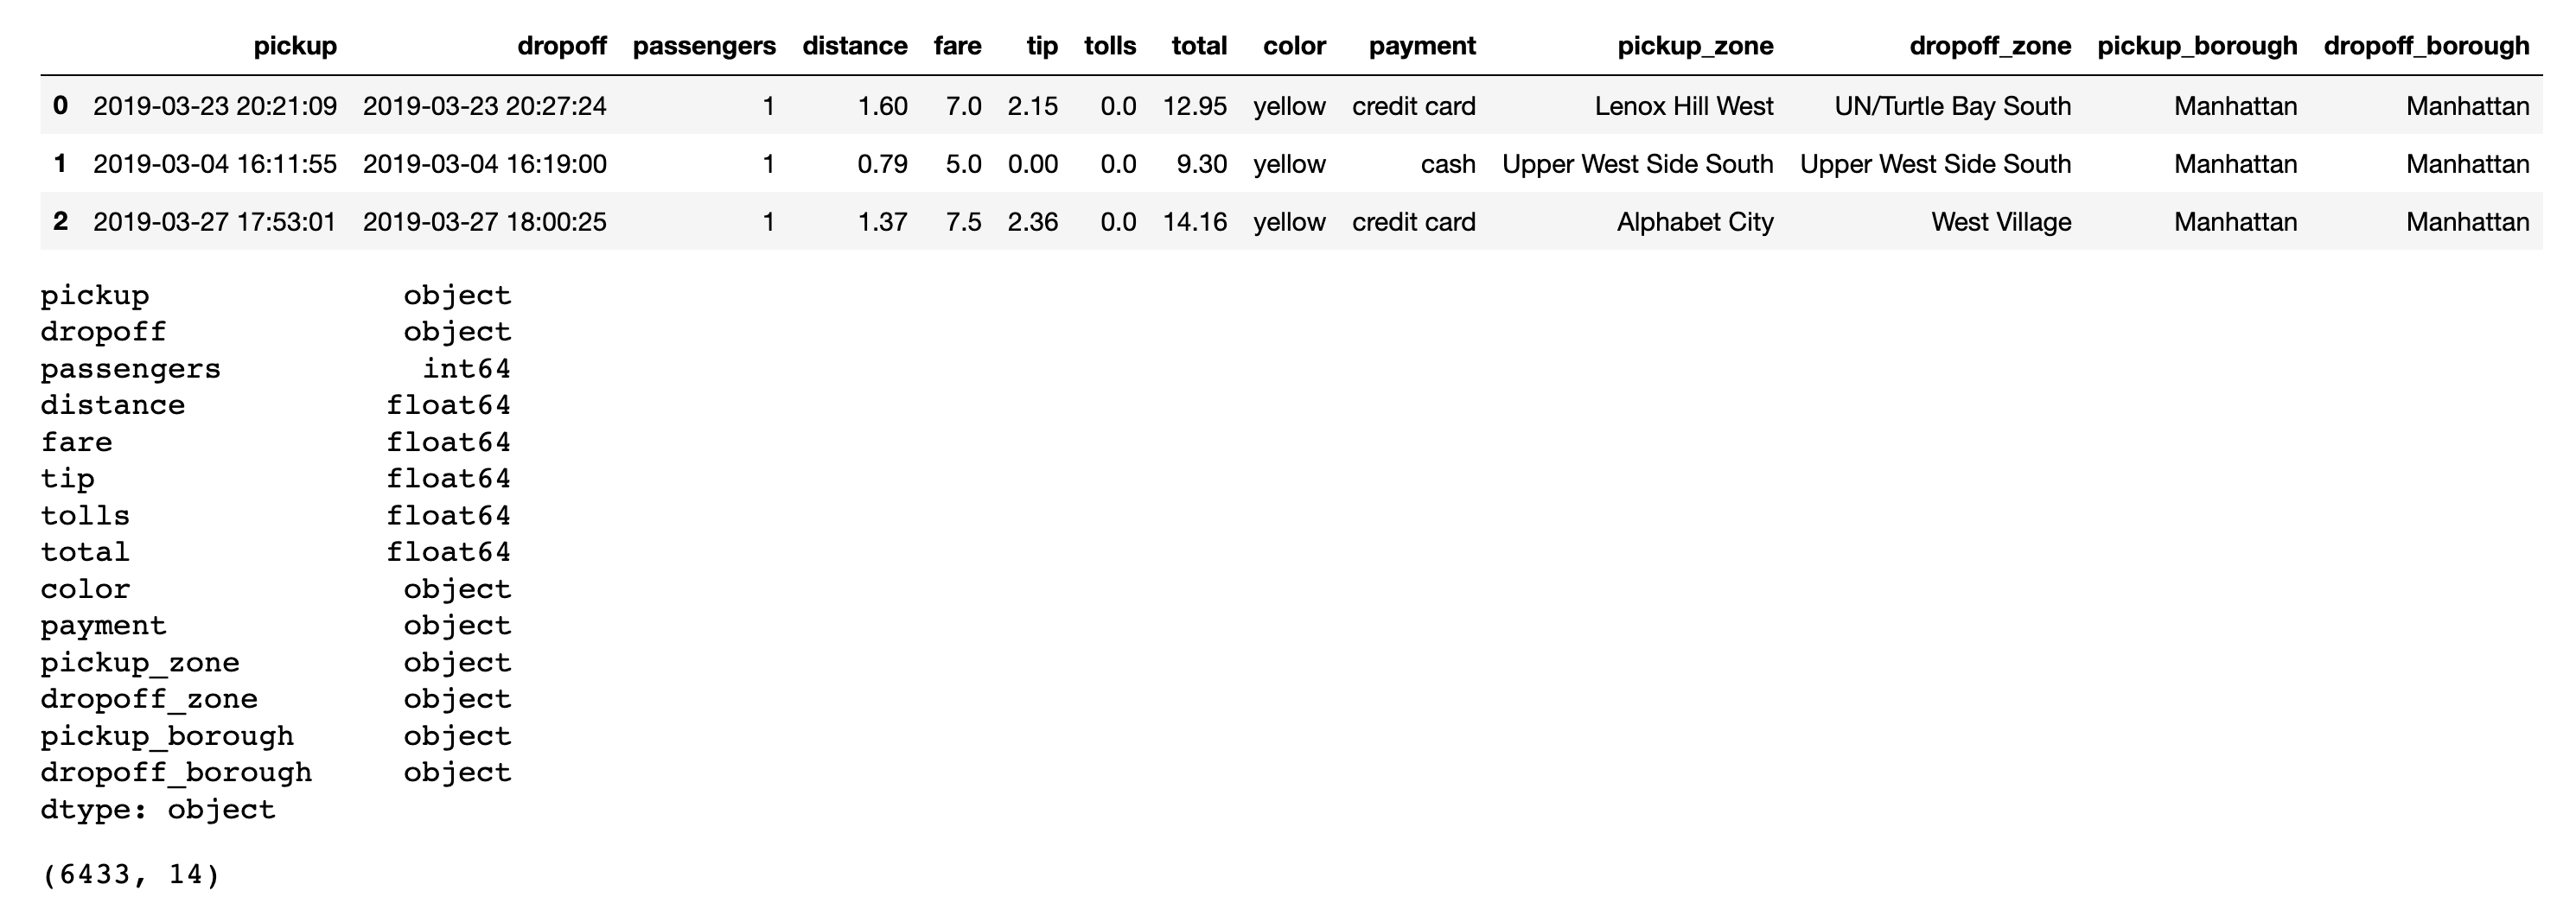

2.Перевіримо, чи є в цьому наборі даних пропущені значення. Для цього можемо вивести кількість пропущених значень в кожній колонці наступним чином (це надзвичайно корисна команда, запамʼятайте її):

In [5]:
df_taxi.isna().sum()

pickup              0
dropoff             0
passengers          0
distance            0
fare                0
tip                 0
tolls               0
total               0
color               0
payment            44
pickup_zone        26
dropoff_zone       45
pickup_borough     26
dropoff_borough    45
dtype: int64

Цікаво, чому дані відсутні? Відповідь на це питання нам дасть розуміння, чи можна такі дані видалити, чи можливо їх треба якось заповнити. Виведіть на екран ті рядки, де колонка, яка має найбільше пропущених значень (або одна з тих, що має максимальну кількість пропущених), має пропущені значення. 
Подивіться на результат і напишіть свої думки щодо питань:
- чому на ваш погляд в цих рядках є відстуні дані в кількох колонках? Чому ви так думаєте?
- чому на ваш погляд є рядки з distance==0, а total!=0? Як ви до цього прйишли?
Відповідь просто текстом. Можна використовувати будь-які допоміжні операції над датасетом чи джерела, які допоможуть вам відповісти на ці питання. Якщо щось використовуєте, то це треба зазначити у відповіді.  

Ваша відповідь тут - це 70% виконання цього завдання.

Відповідь: На мою думку, там поїздки, які не відбулися. Було замовлення, але пасажира так і не забрали (невідомо через які причини), і нікуди не привезли. Або ж поїздки не були завершені. Чому такий висновок? Бо ми бачимо відстань 0, але при цьому немає pickup_zone, dropoff_zone тощо. 

In [6]:
df_taxi[df_taxi['pickup_zone'].isnull()]

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
42,2019-03-30 23:59:14,2019-03-30 23:59:17,1,0.00,80.0,20.08,0.00,100.38,yellow,credit card,NaN,NaN,NaN,NaN
606,2019-03-19 15:04:40,2019-03-19 15:06:15,1,0.40,3.5,1.35,0.00,8.15,yellow,credit card,NaN,Upper East Side South,NaN,Manhattan
622,2019-03-12 19:52:36,2019-03-12 19:52:55,3,0.00,120.0,33.20,12.50,166.00,yellow,credit card,NaN,NaN,NaN,NaN
671,2019-03-09 22:45:46,2019-03-09 22:46:50,1,0.40,3.5,0.00,0.00,7.30,yellow,cash,NaN,Lincoln Square East,NaN,Manhattan
712,2019-03-03 01:24:45,2019-03-03 01:29:32,1,0.80,5.0,1.75,0.00,10.55,yellow,credit card,NaN,West Chelsea/Hudson Yards,NaN,Manhattan
970,2019-03-29 00:02:00,2019-03-29 00:02:05,2,0.00,45.0,5.00,0.00,50.30,yellow,credit card,NaN,NaN,NaN,NaN
1108,2019-03-10 09:33:13,2019-03-10 09:52:04,1,13.40,52.0,11.70,5.76,70.26,yellow,credit card,NaN,NaN,NaN,NaN
1961,2019-03-19 16:43:59,2019-03-19 17:37:22,1,17.82,52.0,13.11,5.76,78.67,yellow,credit card,NaN,Garment District,NaN,Manhattan
2137,2019-03-08 13:27:32,2019-03-08 13:46:23,1,1.40,12.0,3.05,0.00,18.35,yellow,credit card,NaN,NaN,NaN,NaN
2742,2019-03-23 06:20:27,2019-03-23 06:20:59,1,0.00,55.0,0.00,0.00,55.80,yellow,credit card,NaN,NaN,NaN,NaN


In [7]:
df_taxi[df_taxi['distance']==0]

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
42,2019-03-30 23:59:14,2019-03-30 23:59:17,1,0.0,80.0,20.08,0.00,100.38,yellow,credit card,NaN,NaN,NaN,NaN
120,2019-03-21 17:21:44,2019-03-21 17:21:49,1,0.0,2.5,0.00,0.00,4.30,yellow,cash,JFK Airport,JFK Airport,Queens,Queens
622,2019-03-12 19:52:36,2019-03-12 19:52:55,3,0.0,120.0,33.20,12.50,166.00,yellow,credit card,NaN,NaN,NaN,NaN
670,2019-03-08 04:50:48,2019-03-08 04:51:07,1,0.0,2.5,0.00,0.00,6.30,yellow,cash,Lenox Hill East,Lenox Hill East,Manhattan,Manhattan
970,2019-03-29 00:02:00,2019-03-29 00:02:05,2,0.0,45.0,5.00,0.00,50.30,yellow,credit card,NaN,NaN,NaN,NaN
1080,2019-03-04 14:17:05,2019-03-04 14:17:13,1,0.0,2.5,0.00,0.00,3.30,yellow,cash,JFK Airport,JFK Airport,Queens,Queens
1207,2019-03-08 15:41:20,2019-03-08 15:41:23,1,0.0,2.5,0.00,0.00,5.80,yellow,NaN,Hudson Sq,Hudson Sq,Manhattan,Manhattan
1482,2019-03-10 20:27:25,2019-03-10 20:28:33,1,0.0,52.0,16.59,0.00,71.89,yellow,credit card,Lincoln Square East,Lincoln Square East,Manhattan,Manhattan
1690,2019-03-22 06:24:14,2019-03-22 06:24:14,1,0.0,72.0,0.00,0.00,72.00,yellow,NaN,East New York,NaN,Brooklyn,NaN
1910,2019-03-25 14:37:56,2019-03-25 14:38:22,1,0.0,2.5,0.01,0.00,3.31,yellow,credit card,Queensbridge/Ravenswood,Queensbridge/Ravenswood,Queens,Queens


3.Заповнимо пусті значення. Оскільки всі колонки набору даних мають пропущені значення в рядках з типом даних рядок, заповнимо пропущені значення рядком `NA`.
Створіть набір даних `df_taxi_clean`, який містить дані `df_taxi` із заповненими пропущеними значеннями у всіх колонках (де ті значення відсутні) значенням `NA`.

**УВАГА!** Надалі в роботі треба використовувати `df_taxi_clean`, ми ж його і створили для того, аби далі ним користуватись :)

In [9]:
df_taxi_clean = df_taxi.fillna('NA')

Після виконання завдання запустіть наступну клітинку:

In [10]:
df_taxi_clean.isna().sum()

pickup             0
dropoff            0
passengers         0
distance           0
fare               0
tip                0
tolls              0
total              0
color              0
payment            0
pickup_zone        0
dropoff_zone       0
pickup_borough     0
dropoff_borough    0
dtype: int64

Очікуваний результат виконання коду в попердній клітинці:

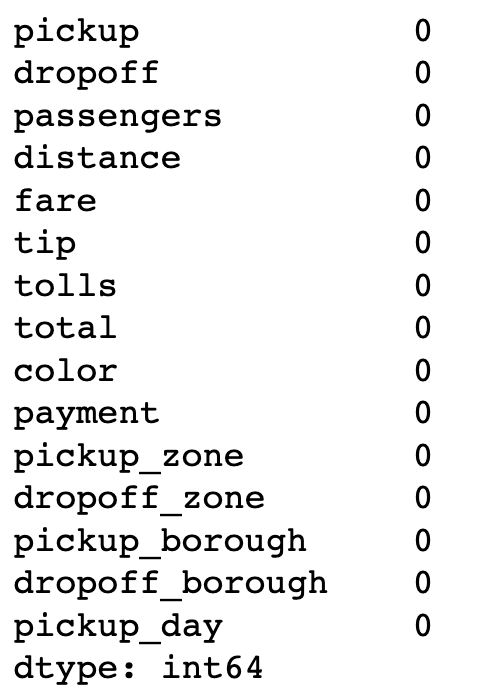

4.Хочеться подивитись на дані у динаміці. Перетворіть колонку `pickup` набору даних `df_taxi_clean` (нам нема чого працювати з "брудними" даними, якщо ми їх вже почистили, але хай будуть в окремій змінній про всяк випадок) у формат `datetime64[ns]`. Результат перетворення збережіть в тій самій колонці `pickup`.

In [11]:
df_taxi_clean.pickup = pd.to_datetime(df_taxi_clean.pickup)

In [13]:
df_taxi_clean.dtypes

pickup             datetime64[ns]
dropoff            datetime64[ns]
passengers                  int64
distance                  float64
fare                      float64
tip                       float64
tolls                     float64
total                     float64
color                      object
payment                    object
pickup_zone                object
dropoff_zone               object
pickup_borough             object
dropoff_borough            object
dtype: object

Після виконання завдання запустіть наступну клітинку:

In [14]:
df_taxi_clean.pickup.head(3)

0   2019-03-23 20:21:09
1   2019-03-04 16:11:55
2   2019-03-27 17:53:01
Name: pickup, dtype: datetime64[ns]

Очікуваний результат виконання коду в попердній клітинці:

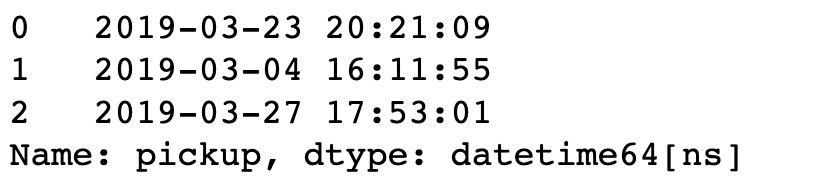

5.У нас колонка pickup зараз мість дані у форматі дата-час. Пропоную прибрати час і зробити аналітику по дням. Для цього виконайте клатинку нижче:

In [15]:
df_taxi_clean['pickup_day'] = df_taxi_clean.pickup.dt.floor('d')

А тепер згрупуйте дані по pickup_day та виведіть графік сумарних платежів по дням. Після виведення графіку скажіть, чи бачите щось дивне на ньому?

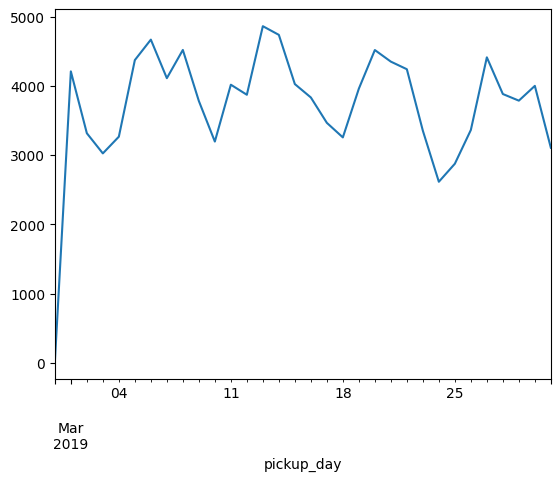

In [16]:
df_taxi_clean.groupby('pickup_day').total.sum().plot();

In [1]:
# Перше значення чомусь дуже низьке

Очікується графік:

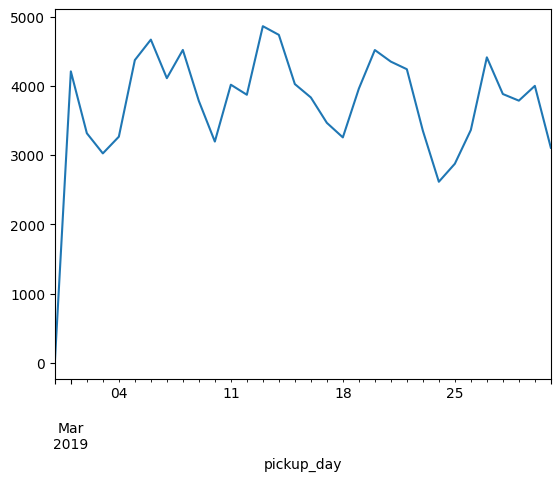

6.Виведіть кількість рядків для кожного pickup_day.

In [17]:
df_taxi_clean.groupby('pickup_day').count()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
pickup_day,,,,,,,,,,,,,,
2019-02-28,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2019-03-01,241,241,241,241,241,241,241,241,241,241,241,241,241,241
2019-03-02,198,198,198,198,198,198,198,198,198,198,198,198,198,198
2019-03-03,169,169,169,169,169,169,169,169,169,169,169,169,169,169
2019-03-04,171,171,171,171,171,171,171,171,171,171,171,171,171,171
2019-03-05,228,228,228,228,228,228,228,228,228,228,228,228,228,228
2019-03-06,257,257,257,257,257,257,257,257,257,257,257,257,257,257
2019-03-07,218,218,218,218,218,218,218,218,218,218,218,218,218,218
2019-03-08,235,235,235,235,235,235,235,235,235,235,235,235,235,235


Маєте побачити, що для дати 2019-02-28 є тільки один рядок. Це запис, який, схоже, потрапив сюди випадково, видаліть з набору даних df_taxi_clean рядок, що містить pickup_day рівний 2019-02-28. Та знову виведіть графік сумарних платежів по pickup_day.

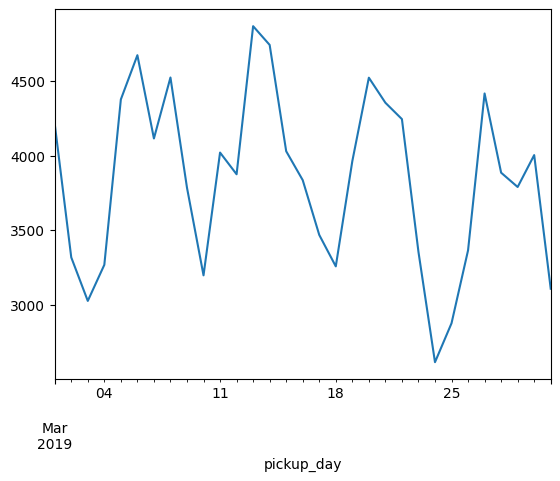

In [18]:
df_taxi_clean = df_taxi_clean.drop(df_taxi_clean[df_taxi_clean['pickup_day'] == '2019-02-28'].index)
df_taxi_clean.groupby('pickup_day').total.sum().plot();

Очікуваний графік:

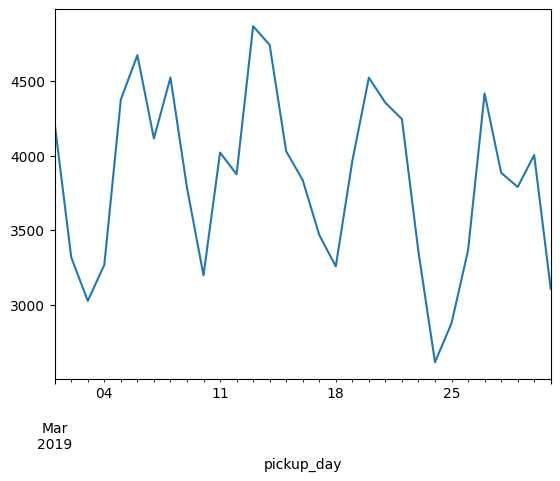

7.Давайте подивимось на динаміку сумарних платежів по районам. Для цього сформуйте на основі `df_taxi_clean` зводну таблицю, де рядками є `pickup_day`, колонками `pickup_borough`, а значенням - сума платежів. Запишіть зводну таблицю в змінну `borough_pivot`. Наостанок, вилучіть колонку зі значенням `pickup_borough` рівним `NA` - уявімо, що ці дані нас не цікавлять.

In [19]:
borough_pivot = df_taxi_clean.pivot_table(index = 'pickup_day', columns = 'pickup_borough', values = 'total', aggfunc='sum').drop('NA', axis=1)
borough_pivot

pickup_borough,Bronx,Brooklyn,Manhattan,Queens
pickup_day,,,,
2019-03-01,123.42,353.05,3169.47,553.29
2019-03-02,NaN,146.56,2716.33,456.13
2019-03-03,80.75,407.06,2100.23,428.73
2019-03-04,92.00,188.73,2026.17,962.18
2019-03-05,98.16,558.40,2981.26,739.56
2019-03-06,130.65,198.53,3501.07,833.36
2019-03-07,NaN,440.75,3087.82,587.13
2019-03-08,79.20,237.47,3408.85,780.34
2019-03-09,80.22,187.88,2967.71,511.73


Далі запустіть наступну клітинку та дайте відповідь на питання, в якому районі найчастіше найбільша сума денних платежів за поїздки на таксі?   
До речі, також рекомендую спробувати запустити команду `borough_pivot.plot()` та зрозуміти, навіщо нам тут частина `fillna(0)`.

ВІДПОВІДЬ: На Манхетені найбільша сума денних платежів за поїздки на таксі.
fillna(0) потрібно, щоб не було NA значено, які завадять створити суцільну лінію графіку

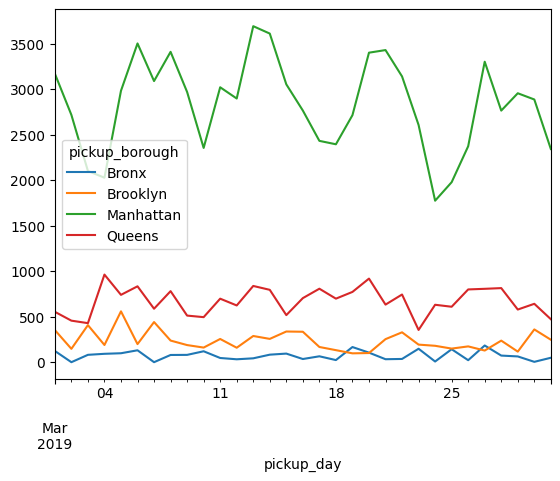

In [20]:
borough_pivot.fillna(0).plot();

Очікуваний графік :

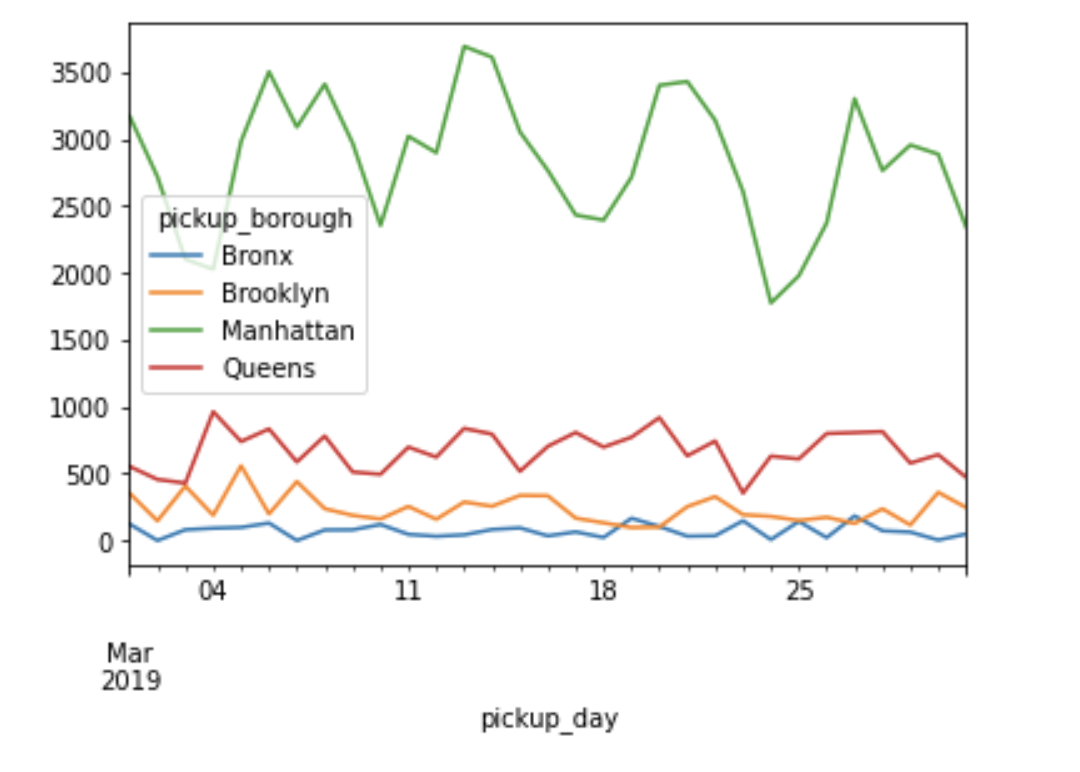

8.Виведіть будь-яким способом гістограми суми денних платежів за поїздки по кожному з районів. Має бути 4 гістограми, на 4ох різних фігурах, або на одній.   
`Підказка:` Найпростіше це буде зробити, використавши `borough_pivot`.  
Пограйтесь з кількістю бінів. Яка кількість бінів на ваш погляд тут є вдалою? Чому?

Відповідь. Погрався з різкою кількістю бінів. Також почитав літературу проькількість бінів. Бачу є різні алгоритми розрахунку оптимальної кількості біні. Але вирішив таки скористатися експертним методом і зупинитися на 10. На мою думку це досить оптимальне число для адекватної / зручної візуалізації такої кількості даних

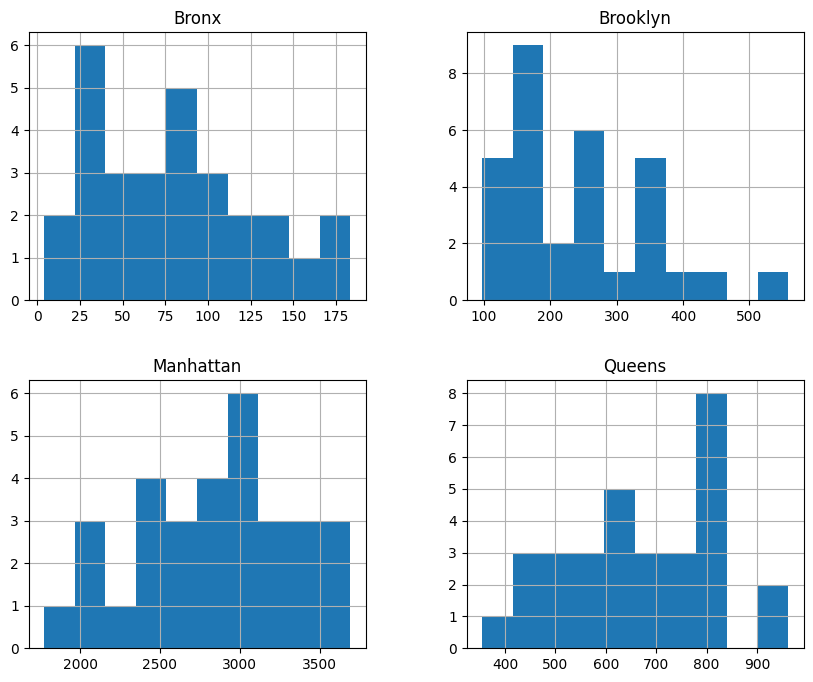

In [21]:
borough_pivot.hist(figsize=(10, 8), bins=10);

Приклад одного з правильних виконань завдання:

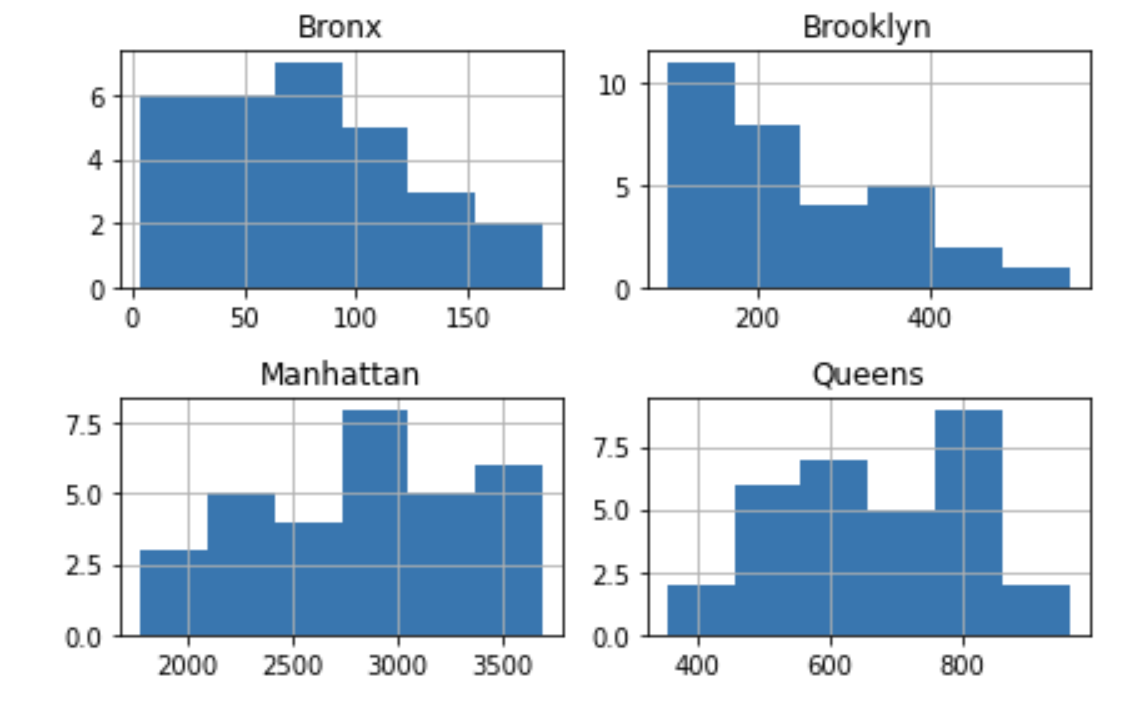

9.Бачимо, що на окремих гістограмах у нас різні діапазони чеків. Припустимо, нам хочеться порівняти розподіли денних сум платежів по райнам. Давайте для цього виведемо 4 гістограми на одній фігурі. Вони звісно ж мають бути різного кольору і напівпрозорими для комфортного перегляду. Створіть гістограму максимально близьку до тої, що надана в очікуваному результаті.
`Підказка:` ця візуалізація створена з допомогою pandas plotting.

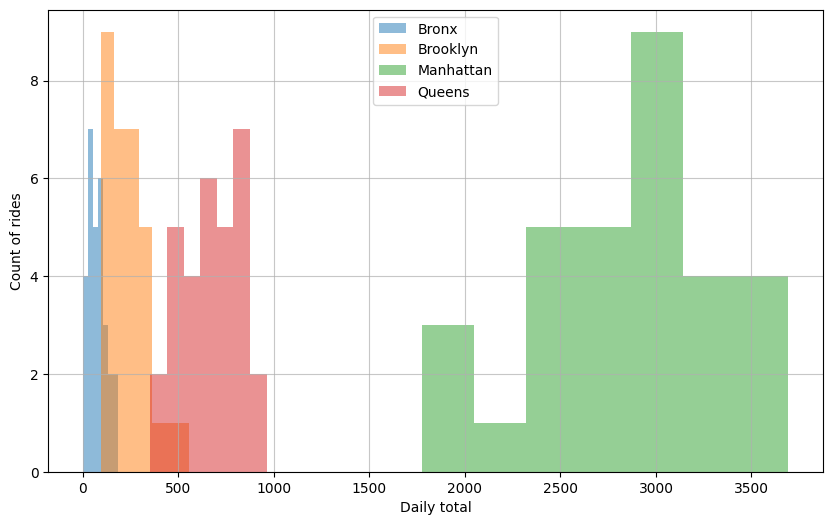

In [22]:
plt.figure(figsize=(10,6))
for col in borough_pivot.columns:
    plt.hist(borough_pivot[col], bins=7, alpha=0.5, label=col)
plt.grid(alpha=0.7)
plt.xlabel('Daily total') 
plt.ylabel('Count of rides') 
plt.legend(loc='upper center')
plt.show();

Очікуваний результат:

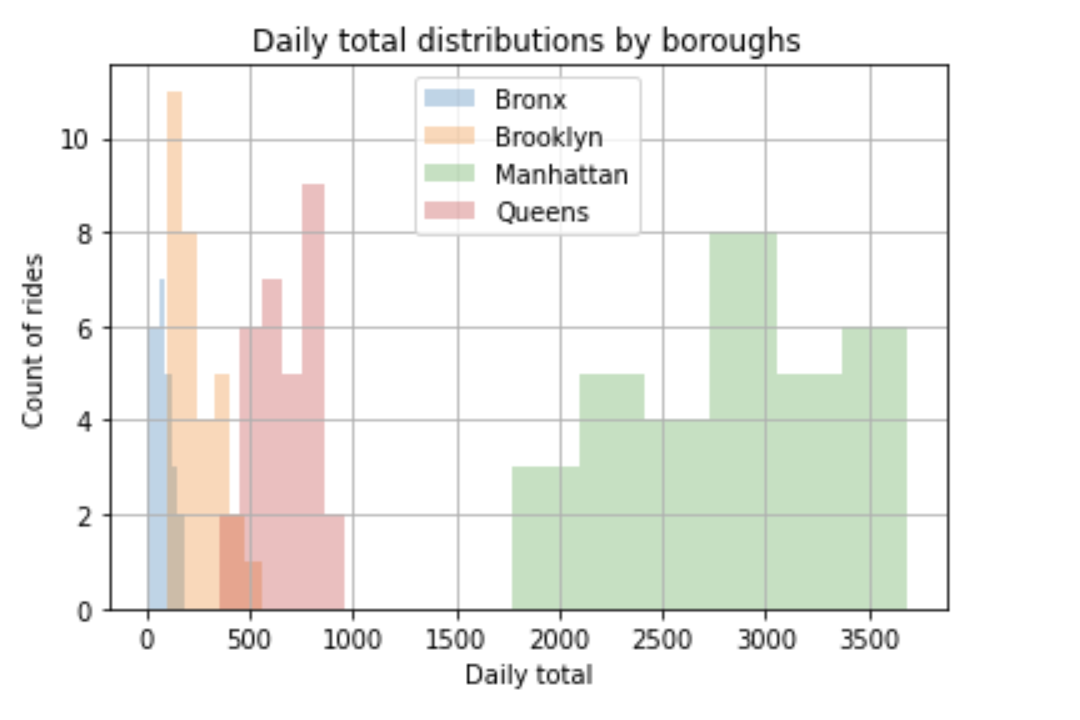

А ось приклад, як можна було сформувати щось подібне з допомогою функціоналу seaborn. Як на мене візуалізація за замовчанням не є зручною для розуміння.  

`Опціональне завдання`: Пограйтесь з налаштуваннями і пошукайте варіант, за якого візуалізація розподілу суми денних платежів через seaborn є на ваш погляд зручною для аналізу.

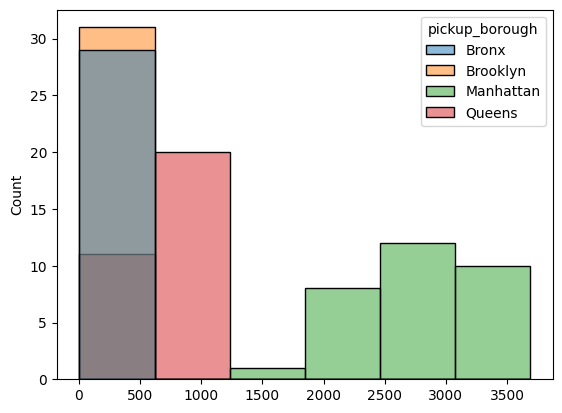

In [34]:
sns.histplot(data=borough_pivot, bins=6);

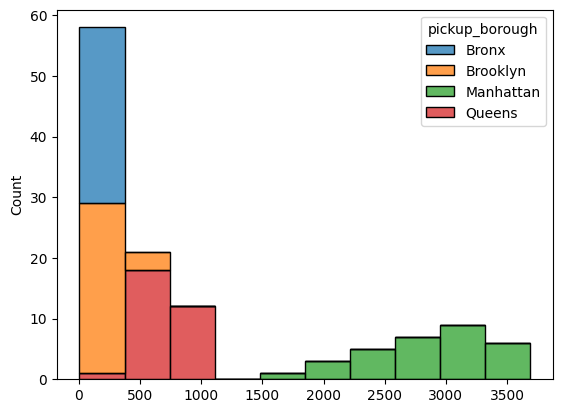

In [43]:
sns.histplot(data=borough_pivot, bins=10, multiple='stack');
  # тут я використав stack, щоб чіткіше було видно різницю між кольорами.

10.З допомогою seaborn виведіть гістограми суми щомісячних платежів по кольорам автомобілів (колонка `color`). На одній фігурі має бути кількість гістограм рівна кількості різних кольорів автомобілів в наборі даних. Встановіть розмір фігури (10,5) та знайдіть значення dots-per-inch для фігури за якого якість зображення буде хорошою (зображення не буде розмитим).
`Підказки:` 
1. побудувати візуалізацію можна в один рядок коду, і ще один рядок - для встановлення розмірів і роздільної здатності фігури. 
2. для зміни порядку відображення гістограм кольорів автомобілів (аби менша гістограма була перед, а не за більшою) можна посортувати датафрейм за полем кольору так, аби отримати той порядок, який вам потрібен. 

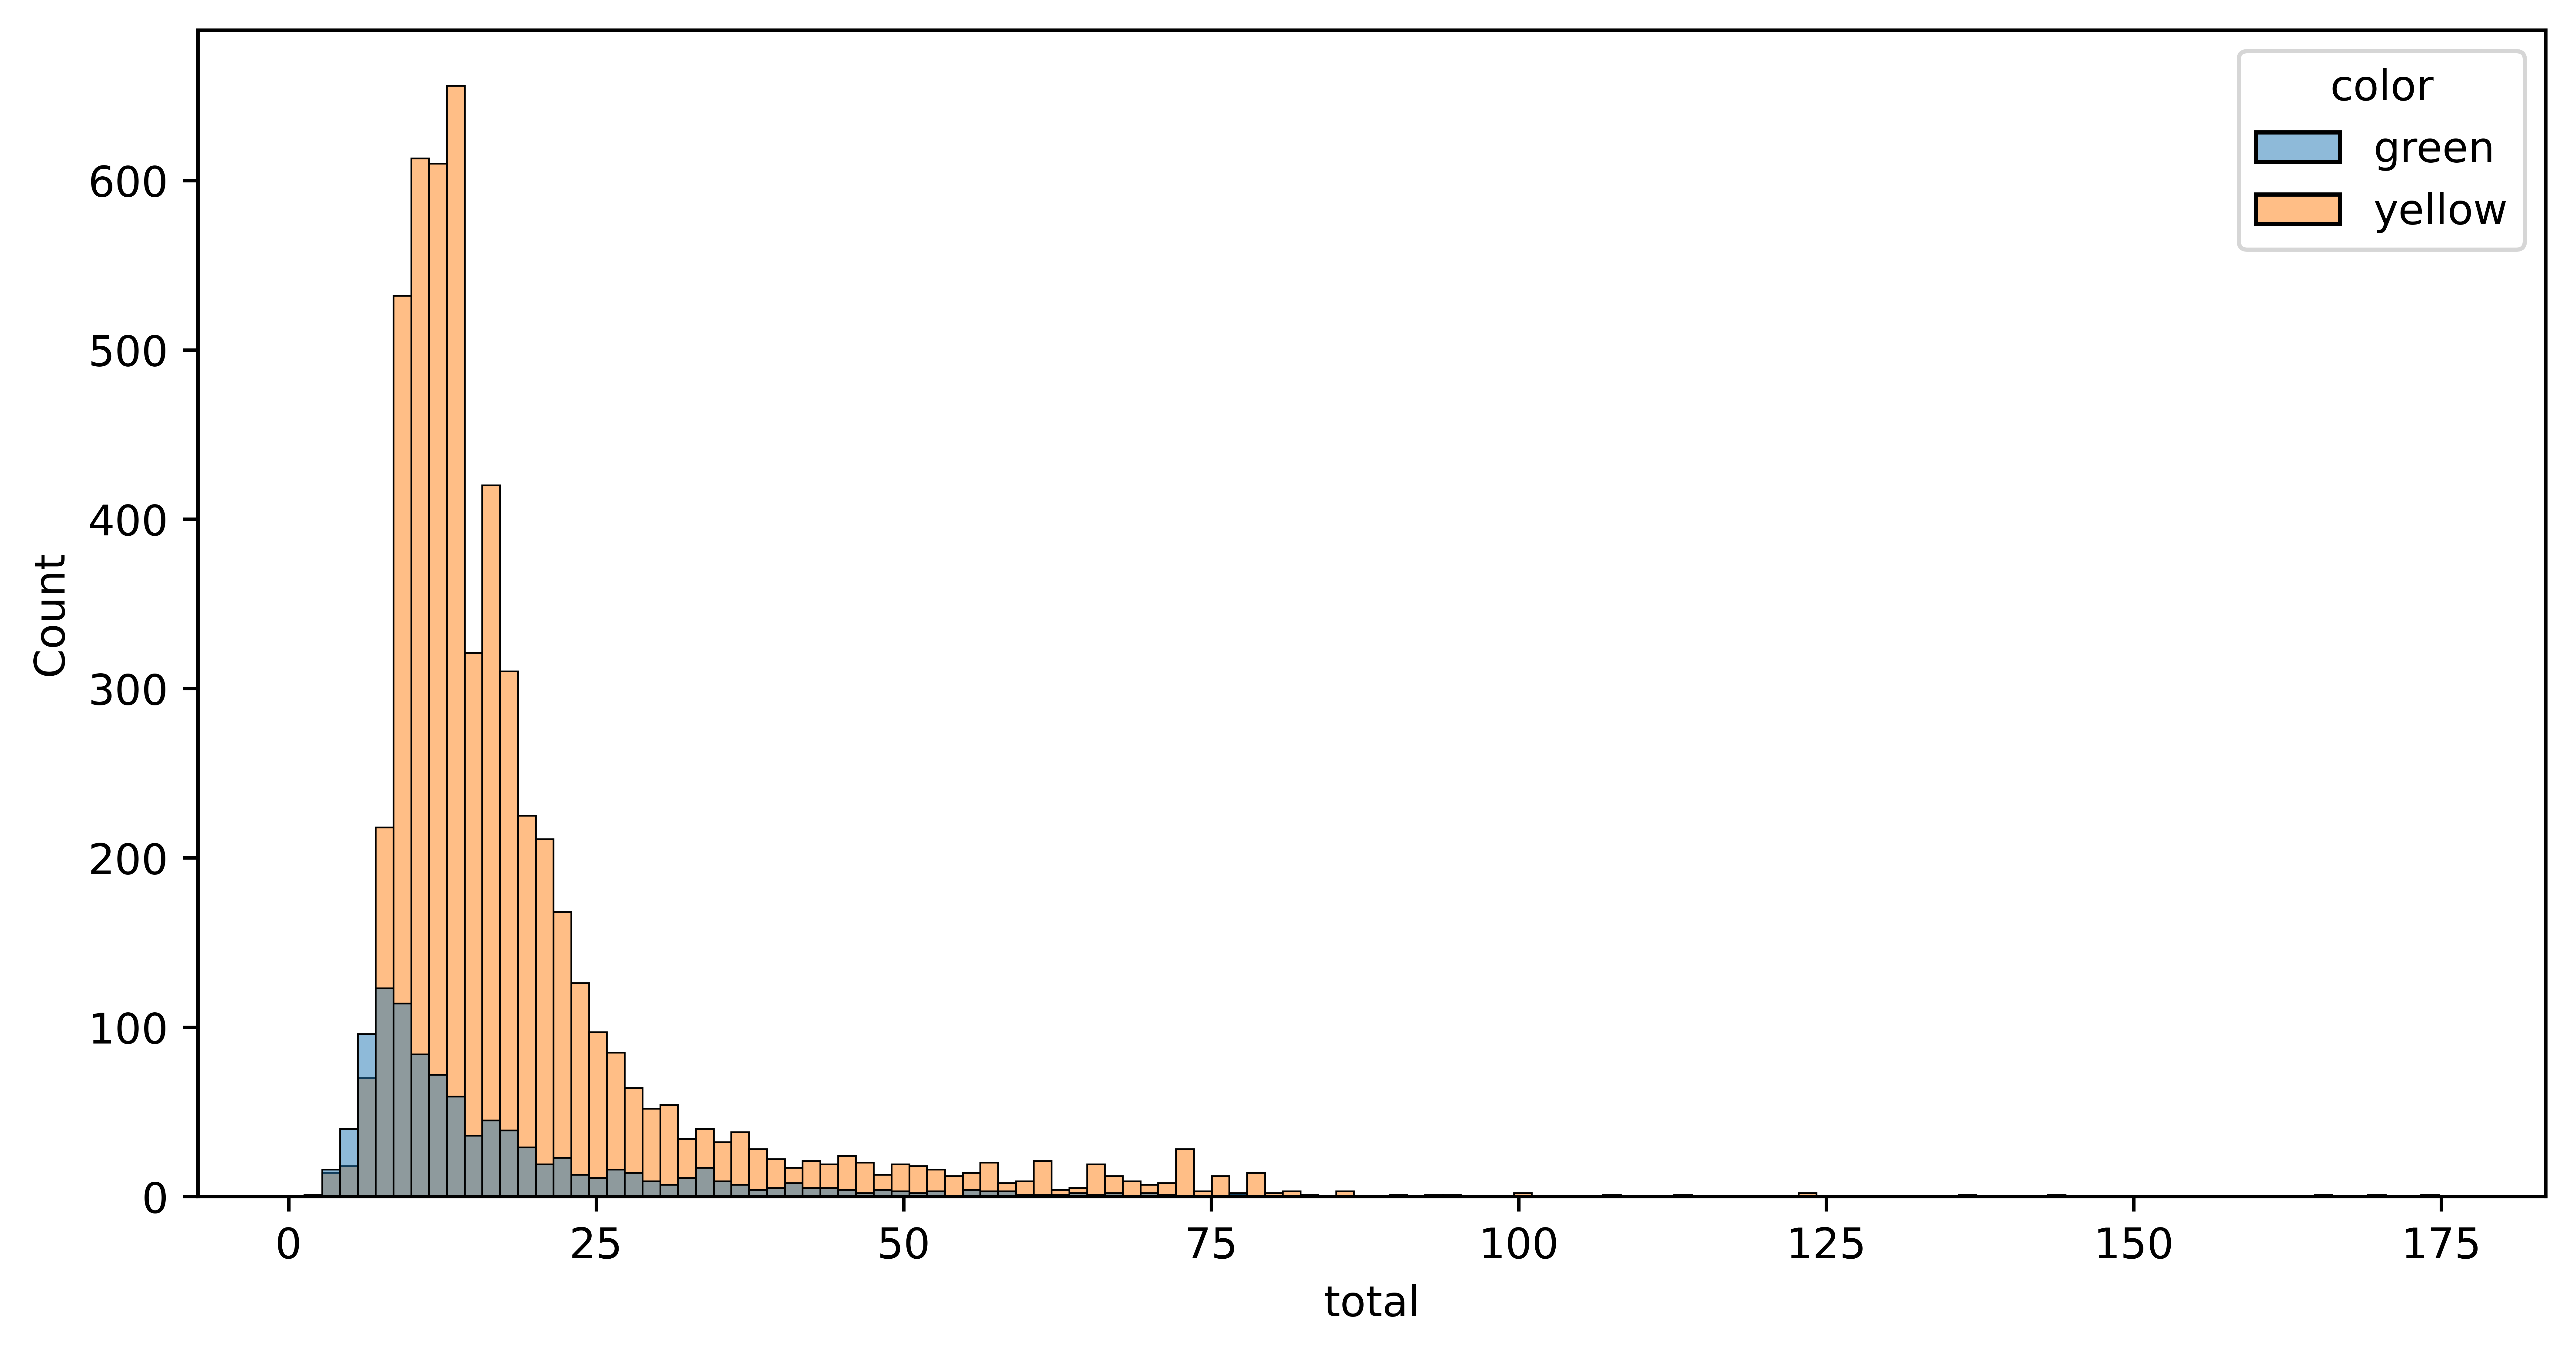

In [44]:
plt.subplots(figsize=(10, 5), dpi=1000)  # встановив розміри та якість
sns.histplot(data=df_taxi_clean.sort_values('color', ascending=True), x='total', hue='color', bins=120);

Очікуваний результат:

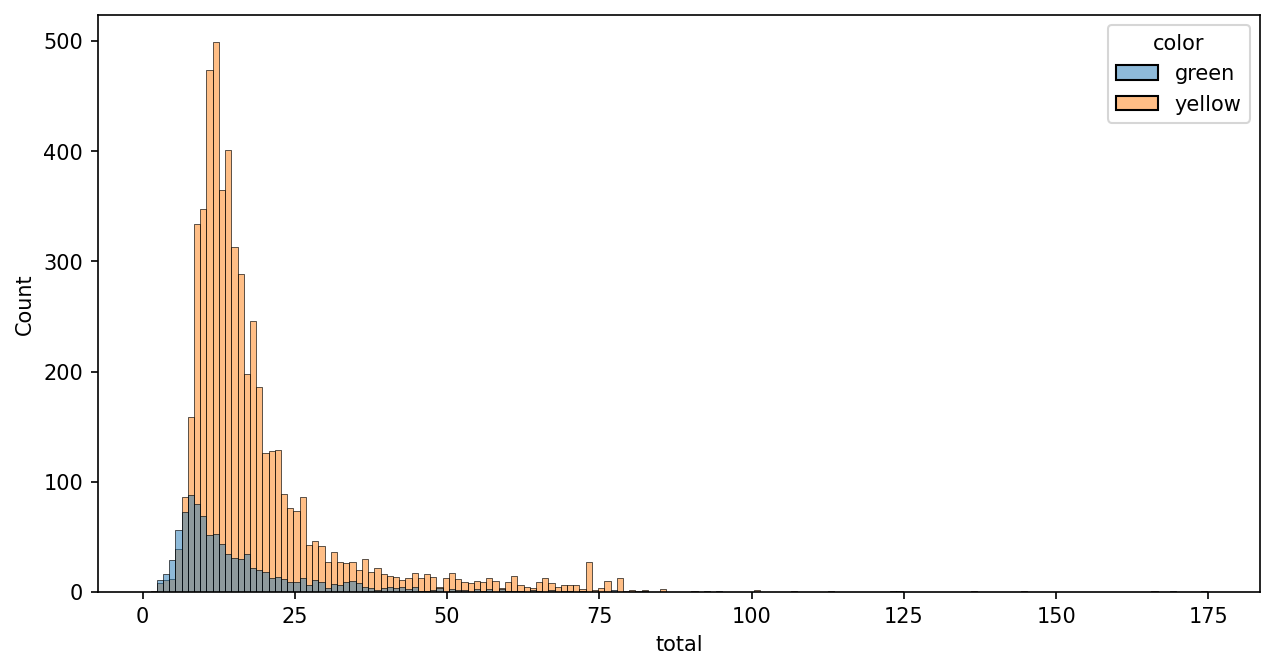

11.Цікаво, а чи є залежність між дальністю поїздки і розміром чайових? Побудуйте діаграму розсіювання між дальністю поїздки і розміром чайових. Можна побудувати графік будь-яким методом, який вам до вподоби, чи хочеться потренувати. 

В очікуваному результаті я надаю графік, який би будувала я. На наведеному прикладі найскладніша частина - це зробити червоною цю лінію тренду (вона побудована з допомогою спеціального типу графіку в seaborn). Аби вказати колір лінії в тому типу графіку треба зазначити в параметрі `line_kws`, що ми хочемо лінію червоного кольору. Але якщо у вас не буде виходити лінія червоного кольору - нехай буде синього - це не критично :) 

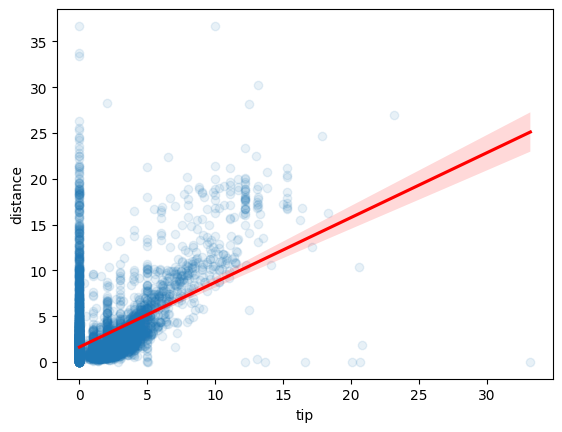

In [122]:
sns.regplot(data=df_taxi_clean, x='tip', y='distance', line_kws={'color': 'red'}, scatter_kws={'alpha': 0.1});

Один з можливих результатів (побудовано з seaborn):

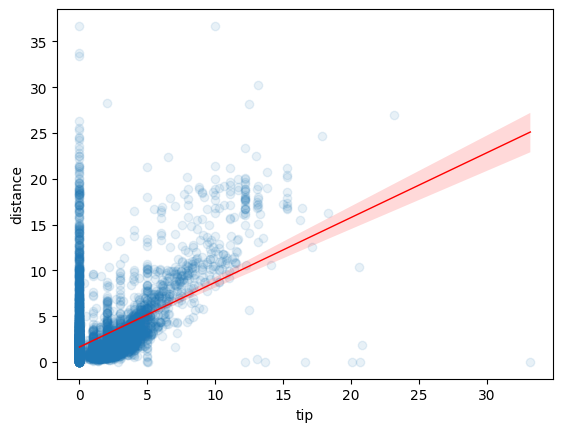

12.Дайте відповідь на питання: що означає пряма лінія з точок, паралельна осі, за якою розташована дальність поїздки?

ВІДПОВІДЬ: Це лінія регресії. У нас пряма залежність між дистанцією та розміром чайових

13.Побудуйте поденну динаміку чайових по районам, в яких забрали пасажира. Можна побудувати графік будь-яким методом, який вам до вподоби, чи хочеться потренувати. Важливо, щоб на одному графіку було 4 лінії (всі райони, крім `NA`), які відображають динаміку чайових, була легенда і були підписи вісей. В очікуваному результаті я надаю графік, який би будувала я. 

Дайте відповіді на питання:
- при початку поїздки в якому районі **найрідше** дають чайові?
- а в поїздках з якого району **найчастіше** дають чайові? 
- при проїздках з його району розмір чайових найстабільніший (найменше змінюється з дня у день)?

ВІДПОВІДІ: 
* Найрідше дають чайові в Бронксі
* Найчастіше дають чайові в Квінсі
* Найстабільніші чайові на Манхеттені.

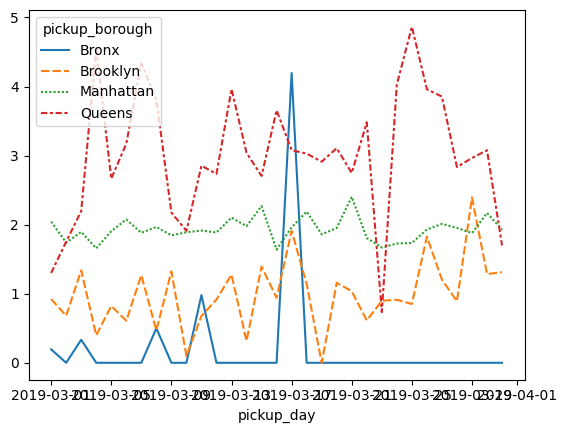

In [90]:
# спочатку ускладнив мабуть собі завдання, робив це через pivot :)
tips_borough = df_taxi_clean.pivot_table(index='pickup_day', columns='pickup_borough', values = 'tip', aggfunc='mean').drop('NA', axis=1)
tips_borough
sns.lineplot(data=tips_borough.fillna(0));


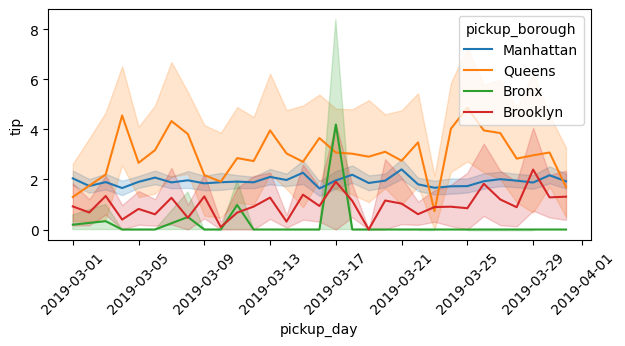

In [46]:
# потім зрозумів, що через півот не вийде зробити як в прикладі 
fig=plt.figure(figsize=(7,3))
hue_order = ['Manhattan', 'Queens', 'Bronx', 'Brooklyn']
sns.lineplot(data=df_taxi_clean.fillna(0), x='pickup_day', y='tip', hue='pickup_borough', hue_order=hue_order)
plt.xticks(rotation=45);

Один з можливих результатів (побудовано з seaborn):

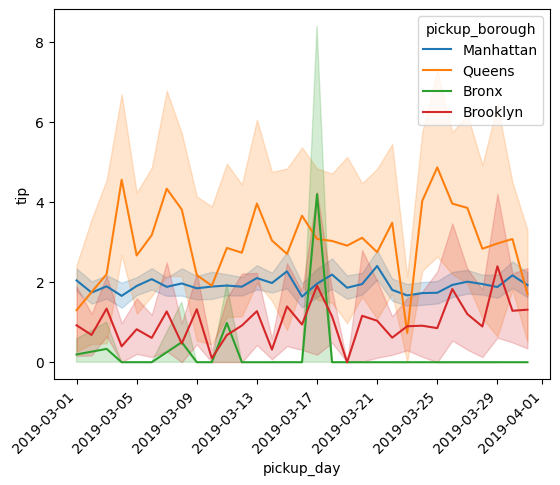

14.Побудуйте box-plot розміру чайових по району (всі райони, крім `NA`) старту поїздки. Можна побудувати графік будь-яким методом, який вам до вподоби, чи хочеться потренувати. 

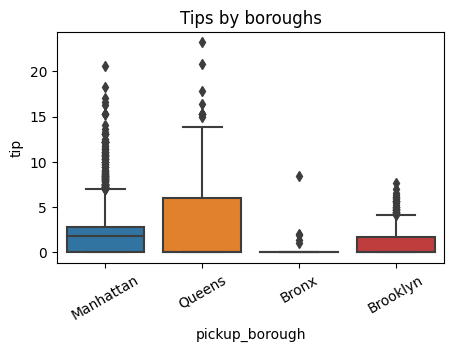

In [109]:
# потім зрозумів, що через півот не вийде зробити як в прикладі 
fig=plt.figure(figsize=(5,3))
order = ['Manhattan', 'Queens', 'Bronx', 'Brooklyn']
sns.boxplot(data=df_taxi_clean.fillna(0), x='pickup_borough', y='tip', order=order)
plt.title('Tips by boroughs')
plt.xticks(rotation=30);

Один з можливих результатів (побудовано з seaborn):

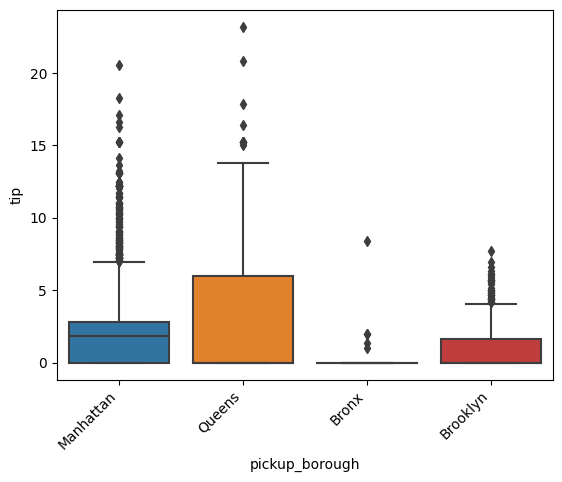

15.Творче завдання. Стовріть ТРИ інформативних візуалізації, які б допомогли в аналізі цих даних.   

Що вам було б цікаво дізнатись про ці поїздки? Як це можна було б використати при прийнятті рішень бізнесом? 
Наприклад, якщо найбільше поїздок в певний час доби, значить, треба стимулювати водіїв працювати в ці години. Якщо найбільше поїздок з певного району - треба тримати там запас авто, які б могли взяти пасажирів і т.д.
Не обмежуйте свою фантазію. 

Візуалізації мають бути не тими, на які ми вже побудували вище. Але можна створювати аналогічні, просто з використанням інших полів даних. І описати, що ви бачите з тих візуалізацій.
Кожна візуалізація оцінюється як 1 завдання. Без виконання цього завдання ДЗ не приймається. Якщо є питання щодо виконання - пишіть у чат.

ДОДАТКОВЕ 1: Вирішив перевірити, з яких районів їздять на довші дистанція. Гіпотезу була, що чим далі від центру, тим довші відстані поїздок. І справді, люди, які живуть на Манхеттені, вони їздять дуже недалеко, по декілька кілометрів. Досить смішні поїздки навіть - менше 1 км. Водночас з інших боро доводиться частіше їздити в сусідні боро, та й боро більші по розміру. Тому мабуть довші поїздки. Мені ці дані були б більш цікаві з боку місцевої влади. Можливо варто стимулювати жителів Манхеттена активніше юзати велосипеди, самокати, якщо актуальні такі короткі відстані)

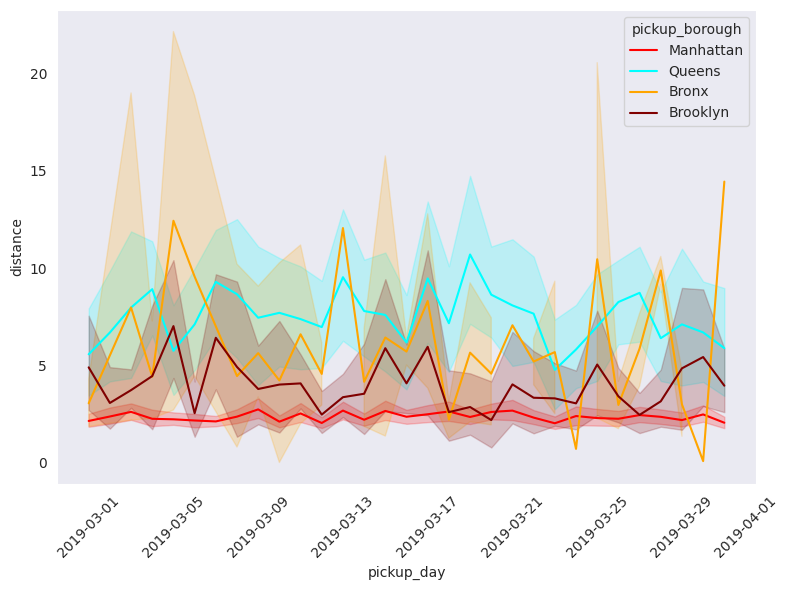

In [230]:
fig=plt.figure(figsize=(8,6))
hue_order = ['Manhattan', 'Queens', 'Bronx', 'Brooklyn']
custom_palette = ['red', 'cyan', 'orange', 'maroon']
with sns.axes_style('dark'):
    sns.lineplot(data=df_taxi_clean.fillna(0), x='pickup_day', y='distance', hue='pickup_borough', hue_order=hue_order, palette=custom_palette)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show();

ДОДАТКОВЕ 2. Вирішив перевірити  з яких районів частіше їдуть за межі районів, а де частіше їздять по району. Думаю це можна використати при створенні промоакцій та знижок, щоб пасажири частіше юзали таксі між далекими районами ніж громадський транспорт. Згідно з отриманими графіками ми можемо побачити, що пасажири з Манхеттену майже завжди катаються по самому Манхеттену (ми вже бачили, що середні відстані дуже малі). А жителі Квінса частіше виїжджають за межі боро, що власне відображається і в найвищих середніх відстанях поїздок на попередньому графіку.

Я ще нагуглив, що самі таксисти не люблять виїжджати з Манхеттена, бо в інших районах і менше безпечно, і потратять більше часу за менші гроші.

In [ ]:
# dropoff_inside.groupby('pickup_borough').pickup.count().plot(kind='bar', stacked=True)

In [64]:
# Може є можливість зробити це якимось коротшим способом в рамках функціоналу пандас?)
dropoff_inside = df_taxi_clean[df_taxi_clean['pickup_borough'] == df_taxi_clean['dropoff_borough']]
dropoff_inside_counts = dropoff_inside.groupby('pickup_borough').pickup.count()
dropoff_outside_counts = df_taxi_clean.groupby('pickup_borough').pickup.count() - dropoff_inside_counts
dropoff_combined = pd.concat([dropoff_inside_counts, dropoff_outside_counts], keys=['rides_inside', 'rides_outside'], axis=1)


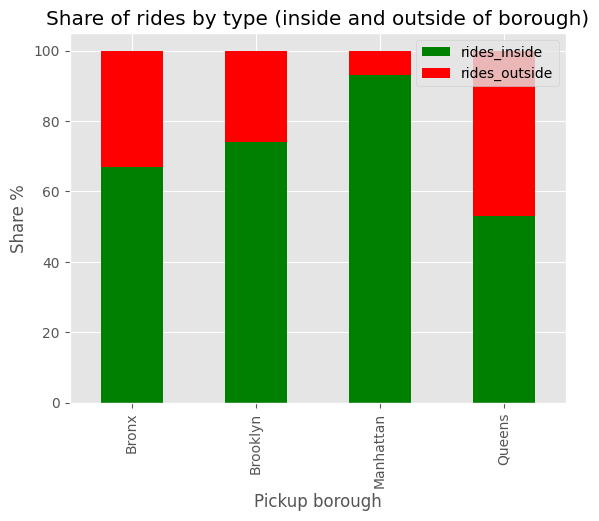

In [69]:
stacked_data = dropoff_combined.apply(lambda x: x*100/sum(x), axis=1).round(0)
stacked_data = stacked_data[stacked_data.index != 'NA']
plt.style.use('ggplot')
stacked_data.plot(kind='bar', stacked=True, color = ('green', 'red'))
plt.title('Share of rides by type (inside and outside of borough)')
plt.ylabel('Share %');
plt.xlabel('Pickup borough');

ДОДАТКОВЕ 3. Мені стало цікаво скільки в середньому катається пасажирів за різними боро. Найменше пасажирів їде в середньому з Бронкса. При цьому там багато також багато поїздок, які фактично не відбулися (0 пасажирів). Водночас в інших районах в середньому подорожує від 1 до 2 пасажирів. При цьому на Манхеттені кількість пасажирів найбільш стабільна в середньому.
Подібний результат може бути зумовлений навіть особливостями роботи громадського транспорту. Тому з Бронкса доводиться частіше їздити 1 пасажиру. Можливо таксі навіть бояться брати більше 1 пасажира, бо є небезпечні частини боро (дуже теоретична версія) 
Окрім цього, це неблагополучний район, тому може бути багато незавершених поїздок. Тому в алгоритми можливо варто закласти ризики, що водій можливо нікуди і не поїде, якщо викликали з Бронксу)).

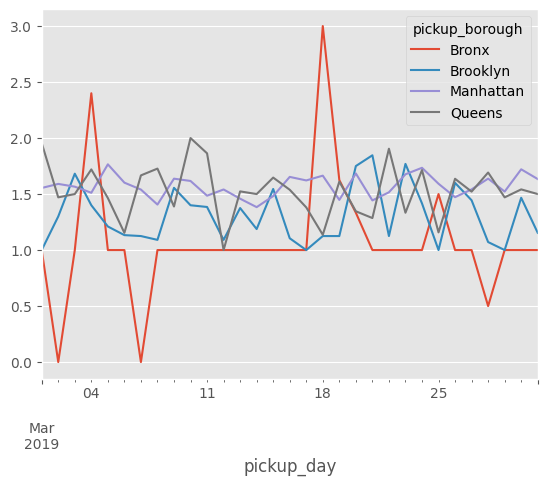

In [67]:
passengers_pivot = df_taxi_clean.pivot_table(index = 'pickup_day', columns = 'pickup_borough', values = 'passengers', aggfunc='mean').drop('NA', axis=1)
passengers_pivot
passengers_pivot.fillna(0).plot();
